In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('ViewingActivity.csv')

In [3]:
data.shape

(2726, 10)

In [4]:
data.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Suren,2020-11-08 13:30:32,00:00:14,NaN,Brooklyn Nine-Nine: Season 4: Crime & Punishme...,NaN,Android DefaultWidevineL3Phone Android Phone,00:18:34,00:18:34,IN (India)
1,Suren,2020-11-08 13:26:41,00:00:03,NaN,Brooklyn Nine-Nine: Season 4: Crime & Punishme...,NaN,Android DefaultWidevineL3Phone Android Phone,00:12:14,Not latest view,IN (India)
2,Suren,2020-11-08 12:15:16,00:38:21,NaN,Marvel's Daredevil: Season 2: Regrets Only (Ep...,NaN,Chrome PC (Cadmium),00:39:24,00:39:24,IN (India)
3,Suren,2020-11-08 10:32:40,00:00:11,Autoplayed: user action: None;,Sherlock: Series 1_hook_primary_16x9,HOOK,Chrome PC (Cadmium),00:00:11,00:00:11,IN (India)
4,Suren,2020-11-08 09:47:37,00:39:37,NaN,Welcome,NaN,Chrome PC (Cadmium),00:44:56,00:44:56,IN (India)


In [5]:
data = data.drop(['Attributes', 'Supplemental Video Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
data.head(1)

,Profile Name,Start Time,Duration,Title,Device Type
0,Suren,2020-11-08 13:30:32,00:00:14,Brooklyn Nine-Nine: Season 4: Crime & Punishme...,Android DefaultWidevineL3Phone Android Phone


In [6]:
data.dtypes

Profile Name    object
Start Time      object
Duration        object
Title           object
Device Type     object
dtype: object

In [7]:
data['Start Time'] = pd.to_datetime(data['Start Time'], utc=True)
data.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration                     object
Title                        object
Device Type                  object
dtype: object

In [8]:
data.head(1)

,Profile Name,Start Time,Duration,Title,Device Type
0,Suren,2020-11-08 13:30:32+00:00,00:00:14,Brooklyn Nine-Nine: Season 4: Crime & Punishme...,Android DefaultWidevineL3Phone Android Phone


In [9]:
data['Start Time'] = pd.to_datetime(data['Start Time'])
data.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration                     object
Title                        object
Device Type                  object
dtype: object

In [10]:
data.head(1)

,Profile Name,Start Time,Duration,Title,Device Type
0,Suren,2020-11-08 13:30:32+00:00,00:00:14,Brooklyn Nine-Nine: Season 4: Crime & Punishme...,Android DefaultWidevineL3Phone Android Phone


In [11]:
data['Duration'] = pd.to_timedelta(data['Duration'])
data.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration            timedelta64[ns]
Title                        object
Device Type                  object
dtype: object

In [12]:
# change the Start Time column into the dataframe's index
data = data.set_index('Start Time')

# convert from UTC timezone to eastern time
data.index = data.index.tz_convert('Asia/Calcutta')

# reset the index so that Start Time becomes a column again
data = data.reset_index()

#double-check that it worked
data.head(1)

,Start Time,Profile Name,Duration,Title,Device Type
0,2020-11-08 19:00:32+05:30,Suren,00:00:14,Brooklyn Nine-Nine: Season 4: Crime & Punishme...,Android DefaultWidevineL3Phone Android Phone


In [13]:
brooklyn = data[data['Title'].str.contains('Brooklyn Nine-Nine', regex=False)]

In [14]:
brooklyn.shape

(1199, 5)

In [15]:
brooklyn['Duration'].sum()

Timedelta('8 days 15:01:08')

In [16]:
data['Duration'].sum()

Timedelta('24 days 09:06:19')

In [17]:
daredevil = data[data['Title'].str.contains('Daredevil', regex=False)]

In [18]:
daredevil['Duration'].sum()

Timedelta('0 days 15:54:37')

In [19]:
brooklyn['weekday'] = brooklyn['Start Time'].dt.weekday
brooklyn['hour'] = brooklyn['Start Time'].dt.hour
brooklyn.head()

C:\Users\tulik\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\tulik\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Start Time,Profile Name,Duration,Title,Device Type,weekday,hour
0,2020-11-08 19:00:32+05:30,Suren,00:00:14,Brooklyn Nine-Nine: Season 4: Crime & Punishme...,Android DefaultWidevineL3Phone Android Phone,6,19
1,2020-11-08 18:56:41+05:30,Suren,00:00:03,Brooklyn Nine-Nine: Season 4: Crime & Punishme...,Android DefaultWidevineL3Phone Android Phone,6,18
7,2020-11-08 12:06:58+05:30,Suren,00:01:26,Brooklyn Nine-Nine: Season 2: USPIS (Episode 8),Netflix Windows App - Cadmium Windows Mobile,6,12
58,2020-10-29 17:22:26+05:30,Suren,00:00:09,Brooklyn Nine-Nine: Season 4: Coral Palms: Par...,Android DefaultWidevineL3Phone Android Phone,3,17
82,2020-10-24 12:19:44+05:30,Suren,00:01:34,Brooklyn Nine-Nine: Season 4: Cop-Con (Episode...,Android DefaultWidevineL3Phone Android Phone,5,12


In [20]:
%matplotlib inline
import matplotlib

C:\Users\tulik\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'Brooklyn 99 Episodes Watched by Day'}>

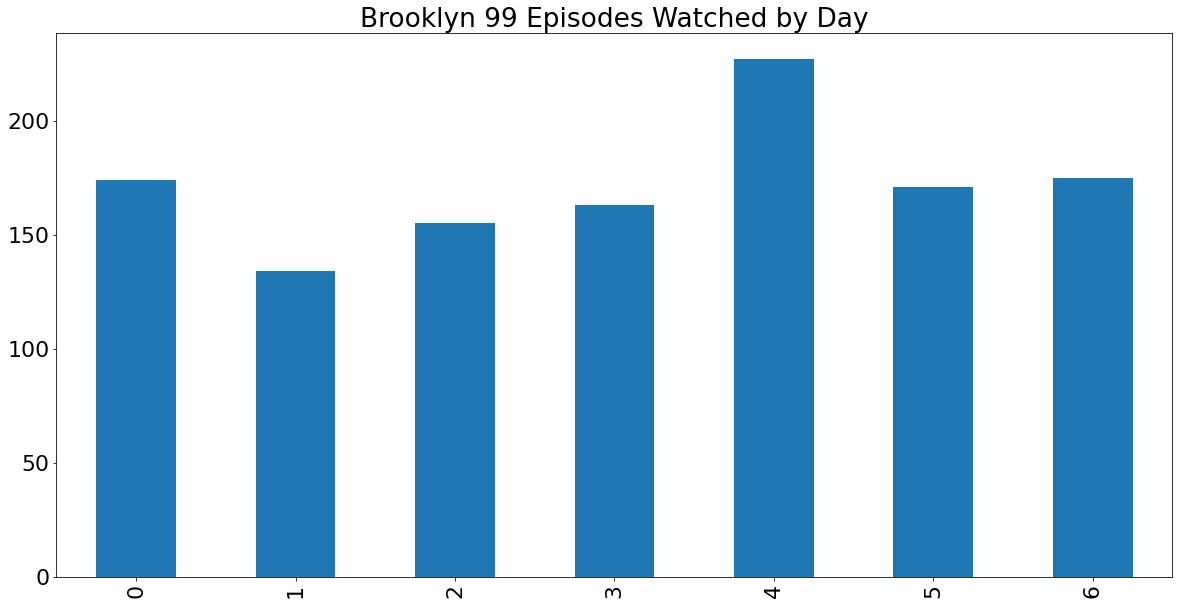

In [21]:
brooklyn['weekday'] = pd.Categorical(brooklyn['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create office_by_day and count the rows for each weekday, assigning the result to that variable
brooklyn_by_day = brooklyn['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
brooklyn_by_day = brooklyn_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot office_by_day as a bar chart with the listed size and title
brooklyn_by_day.plot(kind='bar', figsize=(20,10), title='Brooklyn 99 Episodes Watched by Day')

C:\Users\tulik\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'Brooklyn99 Episodes Watched by Hour'}>

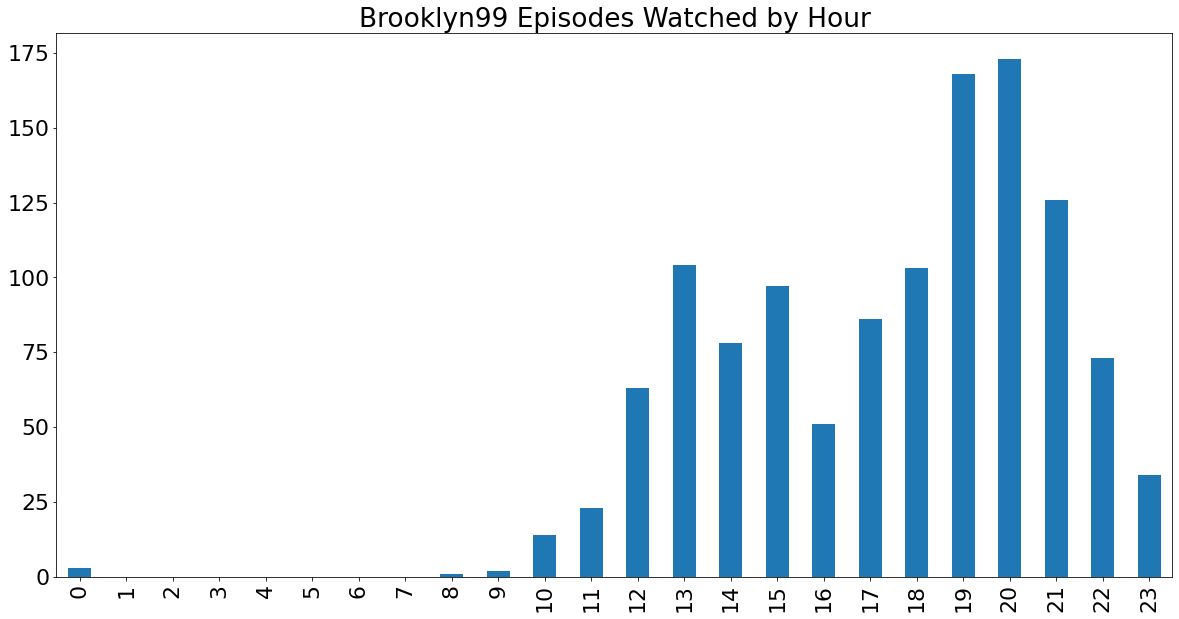

In [22]:
brooklyn['hour'] = pd.Categorical(brooklyn['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create office_by_hour and count the rows for each hour, assigning the result to that variable
brooklyn_by_hour = brooklyn['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
brooklyn_by_hour = brooklyn_by_hour.sort_index()

# plot office_by_hour as a bar chart with the listed size and title
brooklyn_by_hour.plot(kind='bar', figsize=(20,10), title='Brooklyn99 Episodes Watched by Hour')